# < 9. 물체를 분리하자! - 세그멘테이션 살펴보기 >

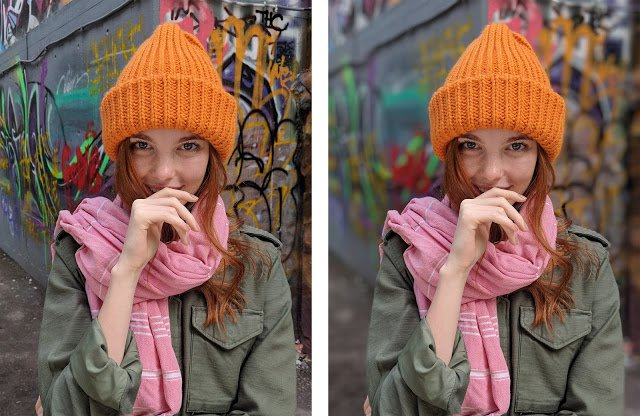

우리가 그동안 다뤄온 이미지 분류(image classification), 객체 인식(object detection) 모델은 이미지에서 어떤 물체의 종류를 분류하거나 물체의 존재와 위치를 탐지해 냅니다.
이번에 배워볼 세그멘테이션(segmentation)은 픽셀 수준에서 이미지의 각 부분이 어떤 의미를 갖는 영역인지 분리해 내는 방법입니다.

위 그림을 보면 세그멘테이션 기술을 쉽게 이해할 수 있습니다. 세그멘테이션은 이미지 분할 기술입니다. 위 사진에서 세그멘테이션 모델은 사람의 영역과 배경 영역을 분리해서 배경을 흐리게 처리하여 아웃포커싱 효과를 보여줍니다.

세그멘테이션은 이미지의 영역을 어떤 영역인지 분리해 내는 기술로 다양한 영역에서 활용되고 있습니다. 위 사진은 실제로 구글의 스마트폰인 Pixel 2에서 쓰이는 인물사진 모드(portrait mode)라고 합니다. 아마도 우리의 핸드폰 속에는 이렇게 알게 모르게 다양한 딥러닝 기반의 기술이 숨어있을 것입니다. 그럼 이제 세그멘테이션을 하나씩 파헤쳐 보겠습니다.


## 학습 내용

1. 세그멘테이션 문제의 종류
2. 주요 세그멘테이션 모델
    - FCN
    - U-NET
    - DeepLab 계열
3. 세그멘테이션의 평가
4. Upsampling의 다양한 방법

---

## 9.2 세그멘테이션 문제의 종류
세그멘테이션 모델들은 다양한 분야에서 활용되고 있습니다. 자율주행 카메라에 적용되어 이미지의 의미를 해석하기도 하고 의료 이미지에서 병이 있는 영역을 판별해 내기도 합니다.

이때 이미지 내에서 영역을 분리하는 접근 방식은 크게 두 가지 방식이 있습니다. 바로 `시맨틱 세그멘테이션(semantic segmentation)` 과 `인스턴스 세그멘테이션(instance segmentation)` 입니다. 영역을 분리한다는 관점에서 비슷하지만, 접근 방식에 따라 문제의 정의와 모델을 구성하는 방식이 달라집니다.

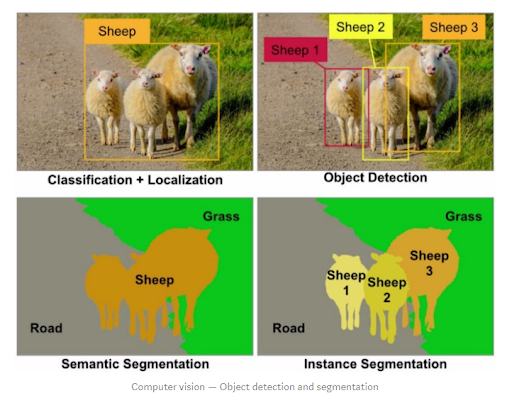

좌상단 사진은 양들이 길에 있는 사진에서 단지 어떤 물체들이 모여 있는 영역의 위치를 인식(localization)과 이 물체들이 양이라는 것을 판별(classification)하는 접근법을 보여줍니다. 그러나 우상단 사진은 비슷하지만 개별 양들의 개체 하나하나의 위치를 정확히 식별하는 객체 인식(object detection)의 접근법을 보여 줍니다.

하단의 두 사진도 이와 비슷한 대비를 보여줍니다. 두 사진 모두 세그멘테이션의 결과를 보여주는 사진이라는 점에서 동일합니다. 좌하단의 경우 양, 길, 풀밭의 영역을 정확히 구분해낼 뿐 양들 각각의 구분해 내진 않습니다. 이런 접근 방식을 시맨틱 세그멘테이션 이라고 합니다. 그러나 우하단의 경우 각 양의 개체들의 영역을 픽셀 단위로 정확히 구분해 내고 있습니다. 이것은 인스턴스 세그멘테이션 의 사례가 됩니다.

### 1) 시맨틱 세그멘테이션(Semantic Segmentation)

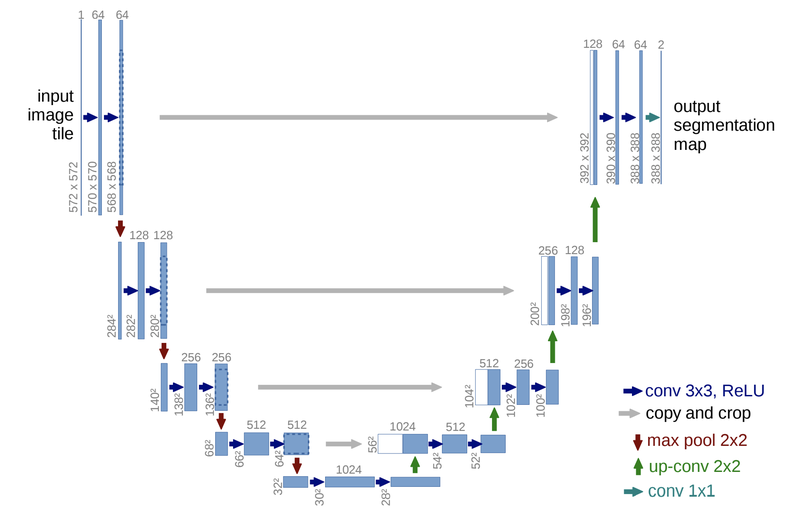
- 시맨틱 세그멘테이션의 대표적인 모델인 U-Net의 구조
- 간단히 구조만 살펴보자면, 입력으로 572x572 크기인 이미지가 들어가고 출력으로 388x388의 크기에 두 가지의 클래스를 가진 세그멘테이션 맵(segmentation map)이 나옵니다.

이때 두 가지의 클래스를 문제에 따라 다르게 정의하면 클래스에 따른 시맨틱 세그멘테이션 맵(semantic segmentation map) 을 얻을 수 있습니다. 처음 봤던 예제의 인물사진 모드라면 사람의 영역과 배경 클래스를, 의료 인공지능에서는 세포 사진에서 병이 있는 영역과 정상인 영역 등을 지정해 적용할 수 있습니다.



### 2) 인스턴스 세그멘테이션(Instance Segmentation)
인스턴스 세그멘테이션은 같은 클래스 내에서도 각 개체(instance)들을 분리하여 세그멘테이션을 수행합니다. 위에서 언급한 시맨틱 세그멘테이션보다 더욱 어려운 과제일 텐데 어떻게 접근하면 좋을까요? 우리가 지금까지 배워왔던 방식으로 짐작해 본다면 물체 검출(object detection) 모델로 각 개체를 구분하고 이후에 각 개체 별로 시맨틱 세그멘테이션을 수행하면 인스턴스 세그멘테이션을 할 수 있지 않을까요?

이러한 방식 중 대표적인 것이 `Mask R-CNN` 입니다. 2017년에 발표된 Mask-R-CNN은 2-Stage Object Detection의 가장 대표적인 Faster-R-CNN을 계승한 것으로서, Faster-R-CNN의 아이디어인 Region of Interest Pooling Layer(RoIPool) 개념을 개선하여 정확한 Segmentation에 유리하게 한 1️⃣RoIAlign, 그리고 2️⃣클래스별 마스크 분리 라는 단순한 두 가지 아이디어를 통해, 클래스별 Object Detection과 시멘틱 세그멘테이션을 사실상 하나의 Task로 엮어낸 것으로 평가받는 중요한 모델입니다.

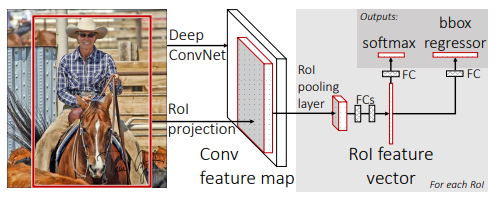

위 RoIPool Layer는 다양한 RoI 영역을 Pooling을 통해 동일한 크기의 Feature map으로 추출해 내는 레이어입니다. 이후 이 고정 사이즈의 Feature map을 바탕으로 바운딩 박스와 object의 클래스를 추론해 냅니다.

이 구성은 Object Detection을 위해서는 크게 문제가 되지 않습니다. 그러나 object 영역의 정확한 마스킹을 필요로 하는 Segmentation 문제에서 문제가 되는 것은 바로 아래 그림에서 설명해 줍니다. 바로 RoIPool 과정에서 Quantization이 필요하다는 점입니다. 아래 그림의 예에서는 16X16으로 분할합니다. 이미지에서 RoI 영역의 크기는 다양한데, 모든 RoI 영역의 가로/세로 픽셀 크기가 16의 배수인 것은 아닙니다. 아래 그림의 예에서 가로 200, 세로 145픽셀짜리 RoI 영역을 16X16으로 분할된 영역 중 절반 이상이 RoI 영역에 덮이는 곳들로 끼워 맞추다 보면, 어쩔 수 없이 RoI 영역 밖이 포함되는 경우도 있고, 자투리 영역이 버려지는 경우도 생기게 됩니다.

이런 상황은 필연적으로 시맨틱 세그멘테이션의 정보손실과 왜곡을 야기하게 됩니다.

Mask R-CNN은 Faster R-CNN에서 특성 추출방식을 "RoIAlign" 방식으로 개선을 하고 세그멘테이션을 더한 방식입니다. 아래 Faster R-CNN과 비교한 구조도를 보면 U-Net처럼 피처 맵(feature map)의 크기를 키워 마스크(mask)를 생성해 내는 부분을 통해 인스턴스에 해당하는 영역, 즉 인스턴스 맵을 추론합니다. Mask R-CNN은 클래스에 따른 마스크를 예측할 때, 여러 가지 태스크를 한 모델로 학습하여 물체 검출의 성능을 높입니다.

아래 그림을 보시면 Bounding box regression을 하는 Bbox head와 마스크를 예측하는 Mask Head의 두 갈래로 나뉘는 것을 볼 수 있는데요. Mask map의 경우 시맨틱 세그멘테이션과 달리 상대적으로 작은 28x28의 특성 맵 크기를 갖습니다. RoIAlign을 통해 줄어든 특성에서 마스크를 예측하기 때문에 사용하려는 목적에 따라서 정확한 마스크를 얻으려는 경우에는 부적합할 수 있습니다.

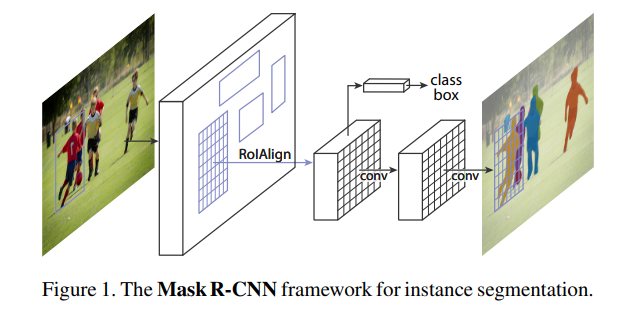


---

## 9.3 주요 세그멘테이션 모델 (1) FCN

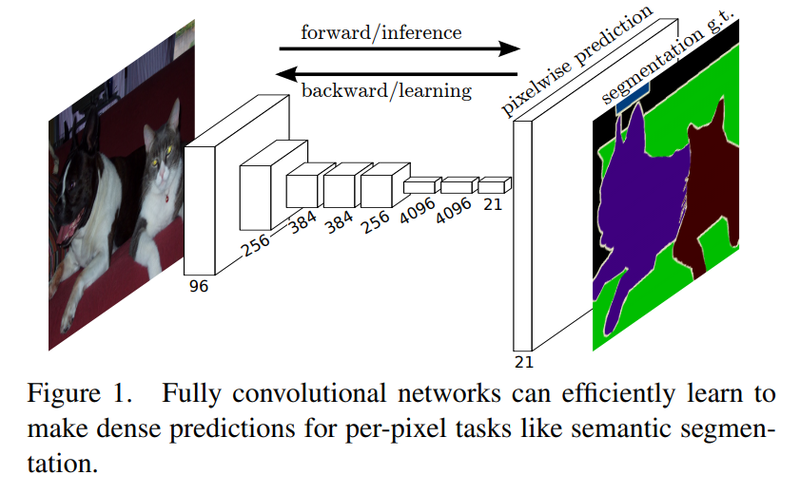

FCN은 이미지넷 챌린지(ImageNet Challenge)에서 좋은 성적을 거두었던 AlexNet, VGG-16 등의 모델을 세그멘테이션에 맞게 변형한 모델입니다. 기본적인 VGG 모델은 이미지의 특성을 추출하기 위한 네트워크의 뒷단에 fully connected layer를 붙여서 계산한 클래스별 확률을 바탕으로 이미지 분류를 수행합니다. FCN에서는 세그멘테이션을 하기 위해서 네트워크 뒷단에 fully connected layer 대신 CNN을 붙여줍니다.

여기서 fully connected layer 대신 CNN을 붙여주는 이유가 뭘까요?

아시다시피 CNN은 이미지 내 위치의 특성을 유지합니다. 하지만 fully connected layer는 위치를 고려하지 않게 되죠. 위치정보를 유지하면서 클래스 단위의 히트맵(heat map)을 얻어 세그멘테이션을 하기 위해, fully connected layer를 CNN으로 대체합니다.

그렇다면 마지막 CNN은 어떤 세팅을 갖게 될까요? 위치의 특성을 유지하면서 이미지 분류를 하기 위해서 마지막 CNN은 1x1의 커널 크기(kernel size)와 클래스의 개수만큼의 채널을 갖습니다. 이렇게 CNN을 거치면 클래스 히트맵을 얻을 수 있습니다.

하지만 히트맵의 크기는 일반적으로 원본 이미지보다 작습니다. CNN과 pooling 레이어를 거치면서 크기가 줄었기 때문인데요. 이를 키워주는 방법을 upsampling 이라고 합니다. Upsampling에는 여러 가지 방법이 있습니다. 그중 FCN에서는 Deconvolution과 Interpolation 방식을 활용합니다. Deconvolution은 컨볼루션 연산을 거꾸로 해준 것이라고 볼 수 있습니다. Interpolation은 보간법으로 주어진 값들을 통해 추정해야 하는 픽셀(여기서는 특성 맵의 크기가 커지면서 메꾸어야 하는 중간 픽셀들을 의미합니다.) 추정하는 방법입니다.

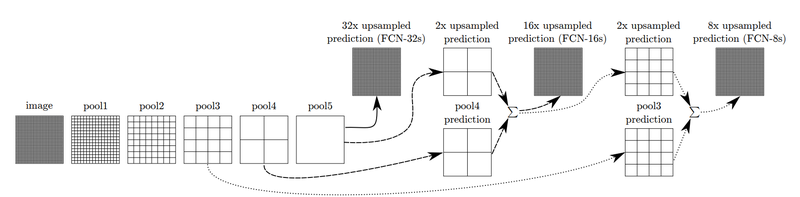

Upsampling만 하면 원하는 세그멘테이션 맵을 얻을 수 있습니다. 그것이 바로 FCN-32s의 경우입니다.

하지만 논문에서는 더 나은 성능을 위해서 한 가지 기법을 더해줍니다. 위 그림에서 확인할 수 있는 Skip Architecture라는 방법입니다. 논문에서는 FCN-32s, FCN-16s, FCN-8s로 결과를 구분해 설명합니다. FCN-16s는 앞쪽 블록에서 얻은 예측 결과 맵과, 2배로 upsampling한 맵을 더한 후, 한 번에 16배로 upsampling을 해주어 얻습니다. 여기서 한 번 더 앞쪽 블록을 사용하면 FCN-8s를 얻을 수 있습니다. 이 기법으로 나아지는 결과는 논문 원문에 소개된 아래 그림에서 확인할 수 있습니다.

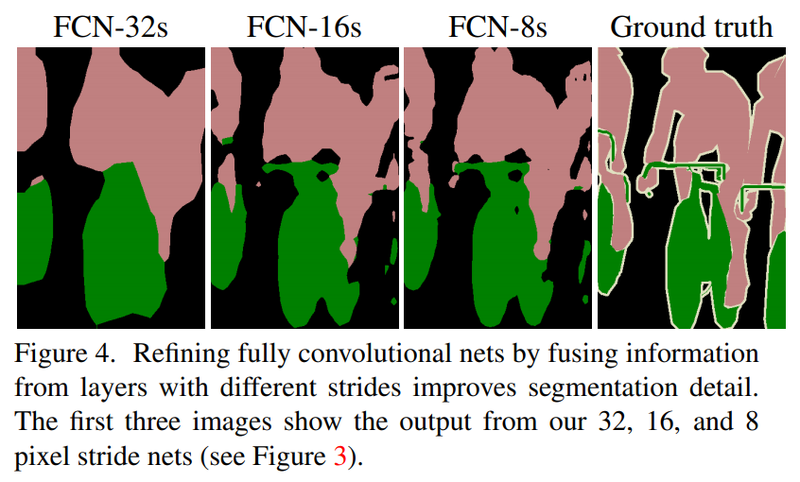

---

## 9.4 주요 세그멘테이션 모델 (2) U-Net

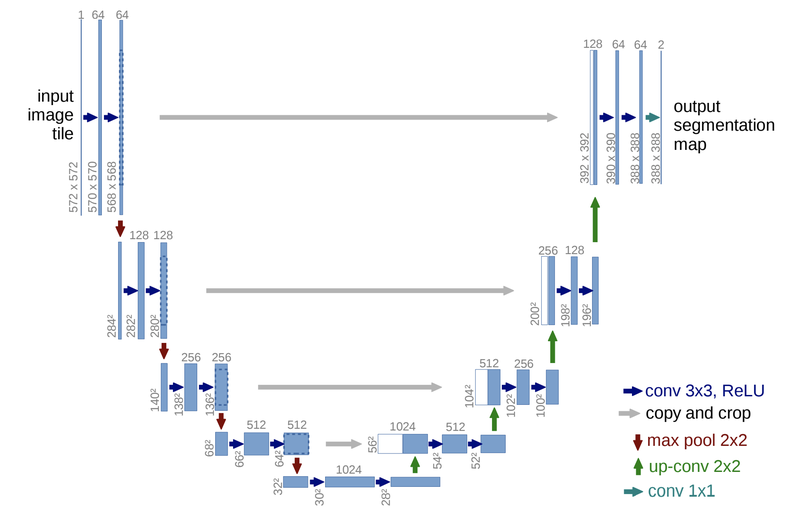

U-Net은 이름에서 볼 수 있듯이 네트워크 구조가 U자 형태를 띠고 있습니다. FCN에서 upsampling을 통해서 특성 맵을 키운 것을 입력값과 대칭적으로 만들어 준 것인데요. 특이한 점은 U-Net이 세그멘테이션뿐만 아니라 여러 가지 이미지 태스크에서 사용되는 유명한 네트워크가 되었지만, 본래 의학 관련 논문으로 시작되었다는 점입니다. 논문 제목에서도 biomedical image segmentation을 위한 네트워크라는 점을 알 수 있습니다.

### 전체 구조
논문에서는 네트워크 구조를 좌측의 Contracting path와 우측의 Expansive path 두 가지로 구분합니다.

좌측의 Contracting path는 일반적으로 우리가 사용해왔던 Convolution network와 유사한 구조를 가집니다. 각 블록은 두 개의 3x3 convolution 계층과 ReLu를 가지고 그 뒤로 downsampling을 위해서 2x2의 커널을 2 stride로 max pooling을 하게 됩니다. Downsampling을 거친 후 다음 convolution의 채널 크기는 두 배씩 늘어나도록 설계되었습니다.

Expansive path에서는 각 블록에 2x2 up-convolution이 붙어 채널이 절반씩 줄어들고 특성 맵의 크기는 늘어납니다. Expansive path의 블록은 contracting block과 동일하게 3x3 convolution이 두 개씩 사용되었습니다.

두 Path에서 크기가 같은 블록의 출력과 입력은 skip connection처럼 연결해 주어 low-level의 feature를 활용할 수 있도록 하였습니다. 마지막에는 1x1 convolution으로 원하는 시맨틱 세그멘테이션 맵을 얻을 수 있습니다.

결과적으로는, 입력으로 572x572 크기인 이미지가 들어가고 출력으로 388x388의 크기에 두 가지의 클래스를 가진 세그멘테이션 맵(segmentation map)이 나옵니다.

#### U-Net의 구조는 대칭이지만 (원 논문의 구현을 기준으로 하면) 모델의 입력값과 출력값의 크기가 다르다
- U-Net에선 padding을 하지않아서 deconvolution으로 확대하더라도 원래 이미지 크기가 될 수 없습니다.

### 타일(Tile) 기법
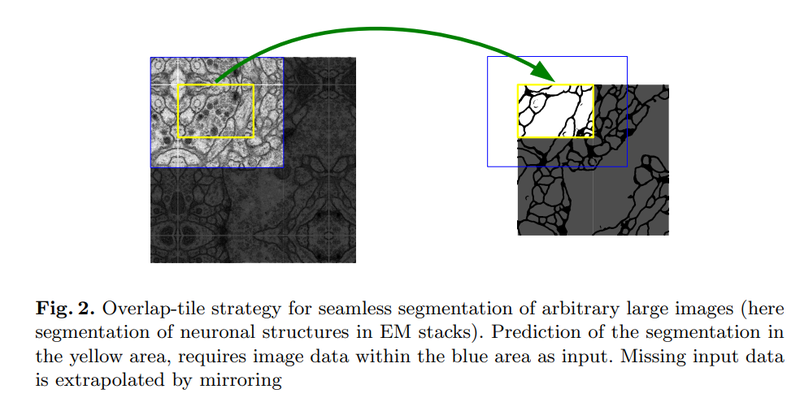

U-Net이 downsampling과 upsampling(또는 인코딩과 디코딩)을 대칭으로 하는 점은 구조에서 한눈에 파악이 됩니다. 그럼 또 다른 차이는 뭘까요? 얻을 수 있는 세그멘테이션 맵의 해상도입니다. FCN은 입력 이미지의 크기를 조정하여 세그멘테이션 맵을 얻어냈습니다. 반면 U-Net은 타일(tile) 방식을 사용해서 어느 정도 서로 겹치는 구간으로 타일을 나누어 네트워크를 추론, 큰 이미지에서도 높은 해상도의 세그멘테이션 맵을 얻을 수 있도록 했습니다.

### 데이터 불균형 해결
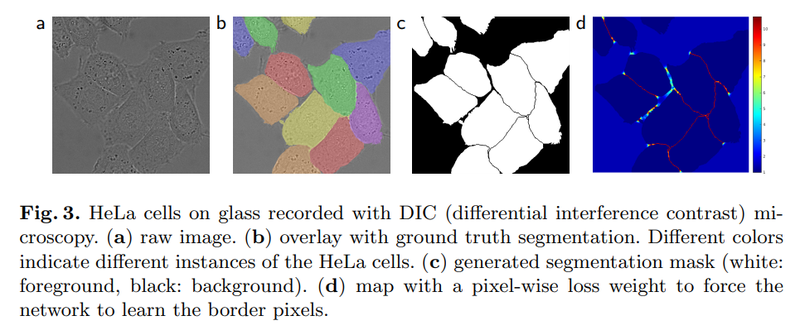

세포를 검출해 내기 위해서는 세포들의 영역뿐만 아니라 경계 또한 예측을 해야 합니다. 이때 픽셀 단위로 라벨을 매긴다고 생각하면, 데이터셋에 세포나 배경보다는 절대적으로 세포 간 경계의 면적이 작을 겁니다. 이러한 클래스 간 데이터 양의 불균형을 해결해 주기 위해서 분포를 고려한 weight map을 학습 때 사용했다고 합니다.

여기서 weight map의 weight를 신경망의 학습 파라미터를 가리키는 weight라고 착각할 수도 있을 것 같습니다. 실제로 여기서 말하는 weight는 손실 함수(loss)에 적용되는 가중치를 말합니다. 의료 영상에서 세포 내부나 배경보다는 상대적으로 면적이 작은 세포 경계를 명확하게 추론해 내는 것이 더욱 중요하기 때문에, 세포 경계의 손실에 더 많은 페널티를 부과하는 방식입니다.



---

## 9.5 주요 세그멘테이션 모델 (3) DeepLab 계열

### 전체 구조
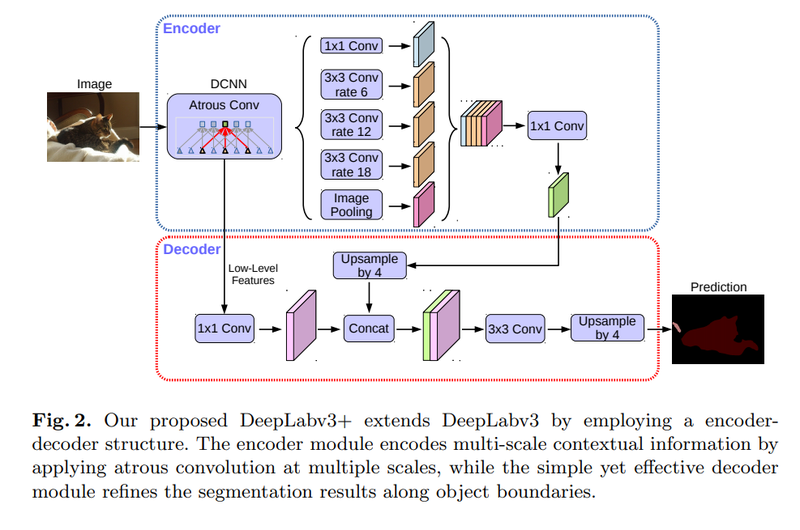

위 그림이 DeepLabV3+인데요. U-Net은 구조가 직관적으로 보였지만 DeepLabV3+는 다소 복잡해 보입니다. U-Net에서의 Contracting path과 Expansive path의 역할을 하는 것이 여기서는 위 그림의 인코더(Encoder), 디코더(Decoder)입니다.

인코더는 이미지에서 필요한 정보를 특성으로 추출해 내는 모듈이고 디코더는 추출된 특성을 이용해 원하는 정보를 예측하는 모듈입니다. 3x3 convolution을 사용했던 U-Net과 달리 DeepLabV3+는 Atrous Convolution을 사용하고 있습니다. 그리고 이로 Atrous Convolution을 여러 크기에 다양하게 적용한 것이 ASPP(Atrous Spatial Pyramid Pooling)입니다. DeepLab V3+는 ASPP가 있는 블록을 통해 특성을 추출하고 디코더에서 Upsampling을 통해 세그멘테이션 마스크를 얻고 있습니다.


### Atrous Convolution
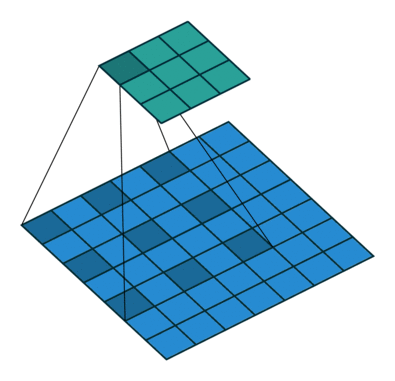

Atrous Convolution은 간단히 말하면 "띄엄띄엄 보는 컨볼루션"입니다. 위 그림에서 우측의 Atrous Convolution은 좌측의 일반적인 컨볼루션과 달리 더 넓은 영역을 보도록 해주기 위한 방법으로 커널이 일정 간격으로 떨어져 있습니다. 이를 통해 컨볼루션 레이어를 너무 깊게 쌓지 않아도 넓은 영역의 정보를 커버할 수 있게 됩니다.


### Spatial Pyramid Pooling

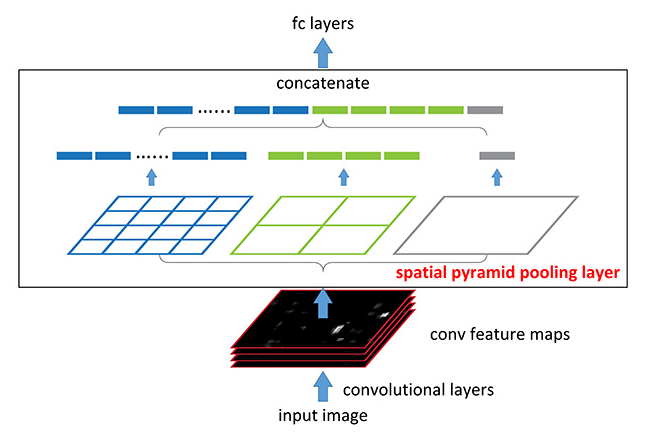

위 그림만으로도 매우 직관적으로 이해할 수 있는 Spatial Pyramid Pooling은 여러 가지 스케일로 convolution과 pooling을 하고 나온 다양한 특성을 연결(concatenate)해 줍니다. 이를 통해서 멀티스케일로 특성을 추출하는 것을 병렬로 수행하는 효과를 얻을 수 있습니다. 여기서 컨볼루션을 Atrous Convolution으로 바꾸어 적용한 것은 Atrous Spatial Pyramid Pooling이라고 합니다. 이러한 아키텍쳐는 입력 이미지의 크기와 관계없이 동일한 구조를 활용할 수 있다는 장점이 있습니다. 그러므로 제각기 다양한 크기와 비율을 가진 RoI 영역에 대해 적용하기에 유리합니다.

---

## 9.6 세그멘테이션의 평가

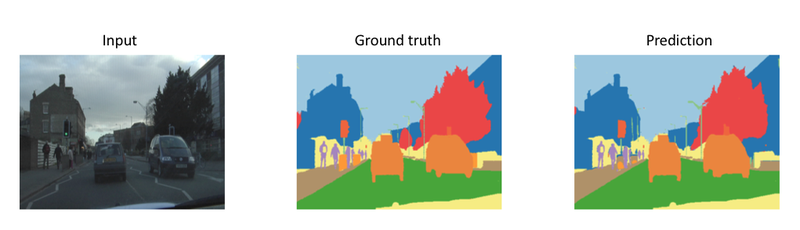

일반적으로 시맨틱 세그멘테이션의 결괏값은 이미지의 크기에 맞는 세그멘테이션 맵 크기 와 시맨틱 클래스의 수에 맞는 채널 크기 를 갖습니다. 여기서 각 채널의 max probability에 따라서 해당 위치의 클래스가 결정됩니다.

위에서 보이는 "Ground truth"와 "Prediction"을 픽셀의 수만큼의 분류 문제로 평가할 수 있습니다.

### 1) 픽셀별 정확도 (Pixel Accuracy)

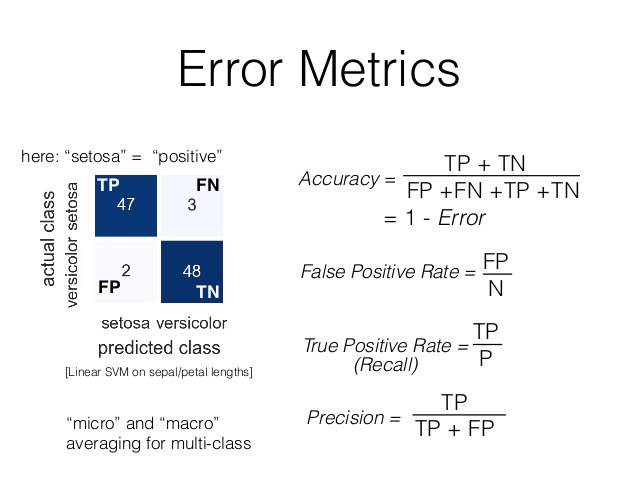

Pixel Accuracy는 쉽게 말해서 픽셀에 따른 정확도를 의미합니다.

세그멘테이션 문제를 픽셀에 따른 이미지 분류 문제로 생각했을 때, 우리는 마치 이미지 분류 문제와 비슷하게 픽셀별 분류 정확도를 세그멘테이션 모델을 평가하는 기준으로 생각할 수 있습니다.

이때 예측 결과 맵(prediction map)을 클래스 별로 평가하는 경우에는 이진 분류 문제(binary classification)로 생각해 픽셀 및 채널 별로 평가합니다. 픽셀 별 이미지 분류 문제로 평가하는 경우에는 픽셀 별로 정답 클래스를 맞추었는지 여부, 즉 True/False를 구분합니다.

예를 들어, 4x4의 크기를 가지는 map에서 중앙의 2x2의 영역이 전경이고 예측 결과 중 한 칸을 놓쳤습니다. 이때는 위에서 보이는 Error Metrics를 확인하면 (TP+TN)/(FP+FN+TP+TN)으로 Accuracy를 구할 수 있습니다. TP(True positive)+ TN(True negative)는 옳게 분류된 샘플의 수로 잘못 예측된 한 칸을 제외한 15입니다. 그리고 False case는 1인 한 칸은 전경이 배경으로 예측되었으니 FN(False negative)입니다. 따라서 분모항은 16이 됩니다. 따라서 Pixel Accuracy는 15/16으로 계산할 수 있습니다.


### 2) 마스크 IoU(Mask Intersection-over-Union)

물체 검출 모델을 평가할 때는 정답 라벨(ground truth)와 예측 결과 바운딩 박스(prediction bounding box) 사이의 IoU(intersection over union)를 사용합니다. 마스크도 일종의 영역임을 생각했을 때 세그멘테이션 문제에서는 정답인 영역과 예측한 영역의 IoU를 계산할 수 있을 것입니다. 아래 식처럼 세그멘테이션 마스크의 IoU는 생각보다 쉽게 계산할 수 있습니다.



In [ ]:
intersection = np.logical_and(target, prediction)
union = np.logical_or(target, prediction)
iou_score = np.sum(intersection) / np.sum(union)

마스크 IoU를 클래스 별로 계산하면 한 이미지에서 여러 클래스에 대한 IoU 점수를 얻을 수 있습니다. 이를 평균하면 전체적인 시맨틱 세그멘테
이션 성능을 가늠할 수 있습니다.

---

## 9.7 Upsampling의 다양한 방법

### 1) Nearest Neighbor
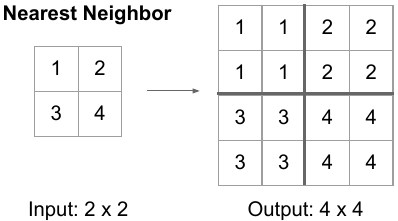

Nearest upsampling은 이름 그대로 scale을 키운 위치에서 원본에서 가장 가까운 값을 그대로 적용하는 방법입니다. 위 그림처럼 2x2 matrix가 있을 때 이를 2배로 키우면 4x4의 matrix가 됩니다. 이때 좌측 상단으로부터 2x2는 입력 matrix의 1x1과 가장 가깝습니다. 따라서 해당 값을 그대로 사용하게 됩니다.

### 2) Bilinear Interpolation
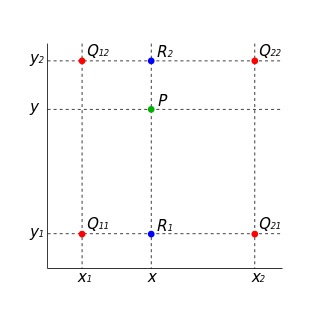

Bilinear Interpolation은 두 축에 대해서 선형보간법을 통해 필요한 값을 메우는 방식입니다. 우리가 2x2 matrix를 4x4로 upsampling을 할 때 위의 이미지처럼 빈 값을을 채워야합니다. 이에 선형보간법(Linear interpolation)을 사용하는 것인데요, 이때 축을 두 방향으로 활용하기 때문에 Bilinear interpolation이라고 합니다.


### 3) Transposed Convolution
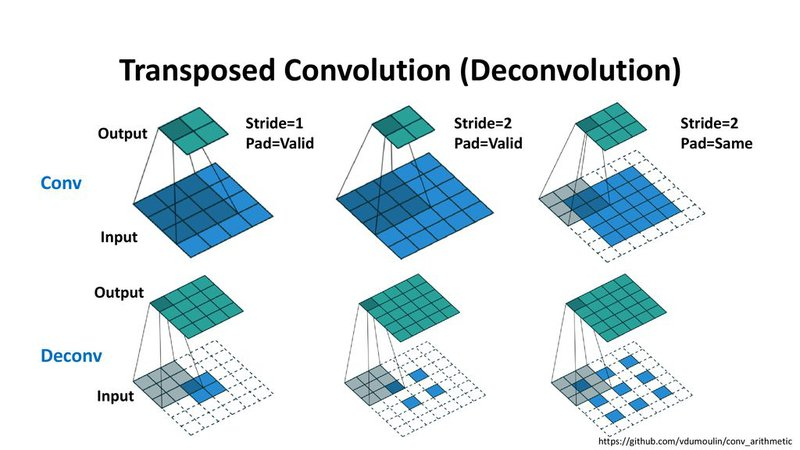

금까지 봤던 방식은 정해진 규칙에 따라서 upscaling하는 방법들을 봤습니다. 그렇다면 학습할 수 있는 파라미터를 가진 Upsampling 방법이 있을까라는 생각을 해볼 수 있을 겁니다. Transposed Convolution이 그 방법 중 하나인데요. 우리가 사용해왔던 Convolution Layer는 Kernel의 크기를 정의하고 입력된 Feature를 Window에 따라서 output을 계산합니다. Transposed Convolution은 이와 반대의 연산을 합니다. 따라서 거꾸로 학습된 파라미터로 입력된 벡터를 통해 더 넓은 영역의 값을 추정해냅니다. 